# **Módulo Análise e Visualização de Dados**
## **Atividade FINAL**
**Grupo:**
*   Luiz Carlos (lcaj@cesar.school),
*   Luiz Henrique (lhscm@cesar.school),
*   Rute Alves (rac3@cesar.school).

## **1 - ENTENDIMENTO DO PROBLEMA DO SEUS DADOS**

O DATASET de perfil de pessoas vacinadas contra COVID 19 no municipio do RECIFE-PE em 2022, tem dados que mostram o perfil das pessoas através da faixa etária de idade, a idade específica da pessoa vacinada, sexo e cor/raça, o número da dose que foi aplicada (SE FOI A PRIMEIRA, SEGUNDA OU TERCEIRA POR EXEMPLO) e a data da vacinação, especifica também o grupo de pessoas, se é PUBLICO GERAL, PESSOAS COM COMORBIDADES, TRABALHADORES DA SAÚDE por exemplo, além disso trás informações como a unidade de saúde onde a vacina foi administrada, o CNES da unidade de saúde (CNES É A IDENTIFICAÇÃO ÚNICA DA UNIDADE DE SAUDE PARA A SECRETÁRIA DE SAÚDE DO ESTADO), a fabricante da vacina, o lote da vacina e o sistema onde foi registrada a confirmação da vacinação.

O conjunto de dados tem o objetivo de mostrar o perfil de pessoas que se vacinaram contra COVID19 no RECIFE-PE em 2022, são em média 700 mil registros de vacinação com dados preenchidos como especificado acima. 

## **2 - ENTENDIMENTO DOS DADOS**

Nosso dataset foi retirado do site da Prefeitura do Recife, onde
em estudo realizado em nosso dataset
é visto colunas das quais precisou ser tratadas e/ou até mesmo dropadas. 
Foi usando a biblioteca do pandas profiling para determinar a qualidade dos dados e descrever 
os resultados de forma assertiva. 
Nosso ideia é formar hipóteses em cima do que foi aprendido em sala de aula.




| Colunas | Tipo                                 | Definição                                            |                                                                                                                                        |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| faixa_etaria | text                                   |Distribuição de acordo com as idades do vacinado                                |                                                                                                                                             |
| idade   | numeric                               | Tempo de vida da pessoa vacinada                      |                                                                 |
| sexo      | text                                        | Mostrar a Diferença que distingue o macho da fêmea                                               |                                                                                                                                             |
| raca_cor      | text                               | Categorização dos vacinados no contexto da vacinação                                               |                                                         |
| municipio    | text |  Divisão territorial no estado de pernambuco                                              |                             |
| grupo    | text| Grupo do qual o vacinado pertence quanto a categoria profissional                                               |  |
| categoria   | text                              |                                                |                                                                                                                                             |
| lote     | text                             | Identificador unico, com finalidade de rastrear da fabricação a aplicação                                               |                                                                                                                                             |
| vacina_fabricante    | text                               | Fabricantes de vacina homologados no Brasil por determinação da ANVISA(Agência Nacional de Vigilância Sanitária)                                               |                                                                                                                                             |
| descricao_dose | numeric                |Nesse contexto serve para informa a quantidade de dose tomada  |                                                                                                                                             |
| cnes | text                        | É a identificação única da unidade de saúde para a secretaria de saude do estado de Pernambuco |                                                                                                                                             |
| sistema_origem | text                        |Site onde é realizado o cadastro do usuario e agendamento para aplicação da vacina  |                                                                                                                                             |
| data_vacinacao | timestamp                        | Data e hora da aplicação da Vacina |                                                                                                                                             |




Nosso dataset foi alimentado entre 10/fev/2022 e 06/fev/2023, mas refente ao ano de 2022.

# **3 - PREPARAÇÃO DOS DADOS**

IMPORTANDO DEPENDENCIAS

In [69]:
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

CONECTANDO AO GOOGLE DRIVER

In [70]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


DEFININDO DATASET.

In [71]:
#Rute
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03. Visualização de Dados/ProjetoFinal/perfil_pessoas_vacinadas_recife.csv', sep=',')
#Luiz Carlos
df = pd.read_csv('/content/drive/MyDrive/posAnaliseDados/arquivosNotebooks/perfil_pessoas_vacinadas_recife2.csv', sep=';')

# **PANDAS PROFILING**

INSTALAÇÃO E IMPORTAÇÃO DO PANDAS PROFILING

In [72]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.1 MB)
  Preparing metadata (setup.py) ... done


In [73]:
from pandas_profiling import ProfileReport

In [74]:
profile = ProfileReport(df, title="Covid", explorative=True)

In [75]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

INSTALAÇÃO E IMPORT DO PLOTLY

In [76]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


EXIBINDO O DATA SET ORIGINAL

In [77]:
df

,_id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,1,35 a 39 anos,35,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM2967,3 - COMIRNATY (PFIZER),2,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2022-02-02T00:00:00
1,2,35 a 39 anos,36,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM2967,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-02-15T00:00:00
2,3,30 a 34 anos,34,FEMININO,PARDA,RECIFE,TRABALHADORES DA EDUCAÇÃO,REDE PÚBLICA - CRECHE,219VCD281Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-02-04T00:00:00
3,4,35 a 39 anos,38,FEMININO,PARDA,RECIFE,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,NaN,219VCD288Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-02-11T00:00:00
4,5,35 a 39 anos,35,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FL4222,3 - COMIRNATY (PFIZER),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-01-11T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738245,738246,35 a 39 anos,36,MASCULINO,PARDA,RECIFE,TRABALHADORES DA SAÚDE,NaN,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-07-28T00:00:00
738246,738247,45 a 49 anos,45,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,21PVCD385W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,ESUS,2022-07-28T00:00:00
738247,738248,35 a 39 anos,36,FEMININO,PARDA,OLINDA,TRABALHADORES DA SAÚDE,NaN,1875740,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),4,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-06-09T00:00:00
738248,738249,35 a 39 anos,37,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,210VCD328W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-04-13T00:00:00


DROPANDO COLUNA QUE NÃO SERÁ USADA

In [78]:
#df.dropna(subset=["categoria"], inplace=True)

VISUALIZANDO LINHAS COM CAMPOS NULOS

In [79]:
dfComNulos = df
dfComNulos.isnull().sum()

_id                       0
faixa_etaria              0
idade                     0
sexo                     16
raca_cor                127
municipio                19
grupo                     0
categoria            621879
lote                    220
vacina_fabricante         0
descricao_dose            0
cnes                      0
sistema_origem            0
data_vacinacao            0
dtype: int64

EXCLUINDO (DROP) TODOAS AS LINHAS COM CAMPOS NULOS DO DATASET

In [80]:
df = df.dropna()

CONFIRMANDO EXCLUSÃO DE LINHAS COM CAMPOS NULOS

In [81]:
df.isnull().sum()

_id                  0
faixa_etaria         0
idade                0
sexo                 0
raca_cor             0
municipio            0
grupo                0
categoria            0
lote                 0
vacina_fabricante    0
descricao_dose       0
cnes                 0
sistema_origem       0
data_vacinacao       0
dtype: int64

CONFIRMANDO EXCLUSÃO DE DADOS NULOS EM GRÁFICO DE CALOR

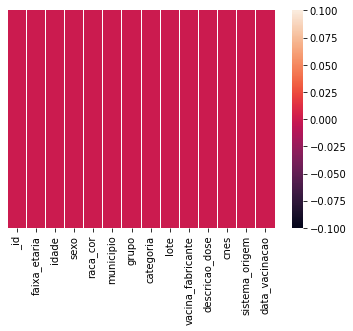

In [82]:
sns.heatmap(df.isnull(), yticklabels=False)
#BOAS PRÁTICAS...
plt.show()

INSERINDO COLUNA QTD VACINADOS, COMO CADA LINHA REPRESENTA UMA PESSOA VACINADA, INSERIMOS ESSA COLUNA PARA FACILITAR NO MANUSEIO DO DADOS MAIS A BAIXO.

In [83]:
df.insert(3,"qtd_vacinados",True)
df['qtd_vacinados'] = 1

<ipython-input-83-cd73035953e3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



EXIBINDO DADOS DO DATASET.

In [84]:
df.head()

,_id,faixa_etaria,idade,qtd_vacinados,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
2,3,30 a 34 anos,34,1,FEMININO,PARDA,RECIFE,TRABALHADORES DA EDUCAÇÃO,REDE PÚBLICA - CRECHE,219VCD281Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-02-04T00:00:00
7,8,30 a 34 anos,34,1,FEMININO,PARDA,RECIFE,GESTANTES E PUÉRPERAS,GRÁVIDAS,FN3543,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-03-14T00:00:00
12,13,35 a 39 anos,36,1,MASCULINO,PRETA,RECIFE,PESSOAS COM COMORBIDADES,PESSOAS COM OBESIDADE MÓRBIDA,FM2951,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-26T00:00:00
21,22,30 a 34 anos,34,1,FEMININO,BRANCA,RECIFE,PESSOAS COM COMORBIDADES,IMUNOSSUPRIMIDOS,FM2967,3 - COMIRNATY (PFIZER),4,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-02-06T00:00:00
25,26,35 a 39 anos,36,1,MASCULINO,PARDA,RECIFE,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,DEMAIS TRABALHADORES INDUSTRIAIS,205H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-03-09T00:00:00


# **4 - ANALISE EXPLORATÓRIA DOS DADOS**

DISTRIBUIÇÃO DE PESSOAS VACINADAS POR FAIXA ETÁRIA

In [85]:
vacinadosPorFaixaEtaria = df.groupby('faixa_etaria').sum().reset_index()
vacinadosPorFaixaEtaria = vacinadosPorFaixaEtaria.sort_values('qtd_vacinados', ascending=True)
px.bar(vacinadosPorFaixaEtaria, x='qtd_vacinados', y='faixa_etaria', color_discrete_sequence=px.colors.qualitative.Pastel2, title='Pessoas vacinadas por faixa etária', height=500, width=1500)

DISTRIBUIÇÃO DE PESSOAS VACINADAS POR GRUPO

In [86]:
figpie = px.pie(df, values=df['grupo'].value_counts(normalize=True).values*100, names=df['grupo'].value_counts().index)
figpie.update_traces(hoverinfo='label', textinfo='percent', title='<b>Porcentagem por Grupo</b>')
figpie.show()

HISTOGRAMA COMPARTATIVO POR IDADE E GÊNERO

In [87]:
fig = px.histogram(df, x="idade", color="sexo")
fig.update_layout(title='<b>Histograma Comparativo por Idade e Gênero</b>',
                  yaxis_title="Quantidade",
                  xaxis_title="Idade")
fig.show()

# **5 - INSIGHTS E AVALIAÇÃO DOS RESULTADOS**

FAIXA ETARIA DE QUEM TOMOU A PRIMEIRA E SEGUNDA DOSE EM 2022

Podemos observa que entre a faixa etaria dos vacinados no ano de 2022 o publico que mais tomou a primeira e segunda dose foram de 35 a 39 anos. E o publico que menor tomou foram os 90 a 94 e 95 a 99 grupos prioritarios no primeiro ano de vacinação.

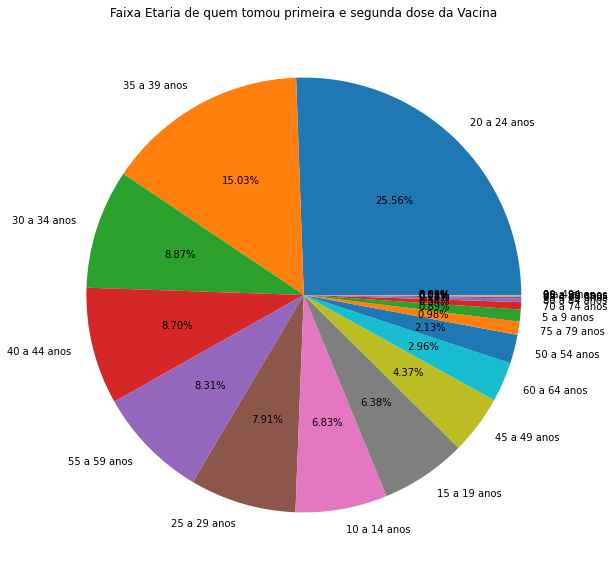

In [88]:
pri_seg_dose = df['descricao_dose'] <= 2

pri_seg_dose = df[pri_seg_dose]

plot1 = plt.figure(figsize=(12,10))
pag_val = pri_seg_dose['faixa_etaria'].value_counts()
labels = pri_seg_dose['faixa_etaria'].unique()
plt.pie(pag_val, labels=labels, autopct='%.2f%%')
plt.title("Faixa Etaria de quem tomou primeira e segunda dose da Vacina")
plt.show()

SEXO DE QUEM TOMOU A PRIMEIRA E SEGUNDA DOSE EM 2022

Entre os sexos, o masculino teve uma maior aplicação de vacinas. Pode-se levantar a hipotese de que, ou os homens teve uma baixa aplicação no primeiro ano de vacinação ou as mulheres foram as que mais tomaram em 2021 e em 2022 a procura foi menor para esse grupo.

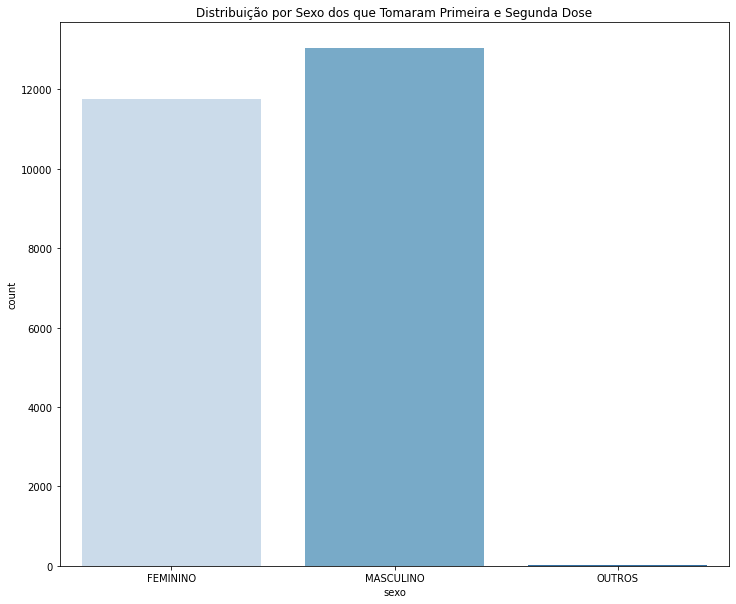

In [89]:
plt.figure(figsize=(12,10))
sns.countplot(x='sexo',data=pri_seg_dose, palette='Blues')
plt.title('Distribuição por Sexo dos que Tomaram Primeira e Segunda Dose')
plt.show()

RAÇA DE QUEM TOMOU A PRIMEIRA E SEGUNDA DOSE EM 2022

Quanto a Raça/Cor podemos visualizar uma distribuição bem difernte uma da outra. Pode-se concluir que o grupo mais vacinado no ano de 2022 foi o de cor parda e o de menor foi do grupo indigena e não informados.

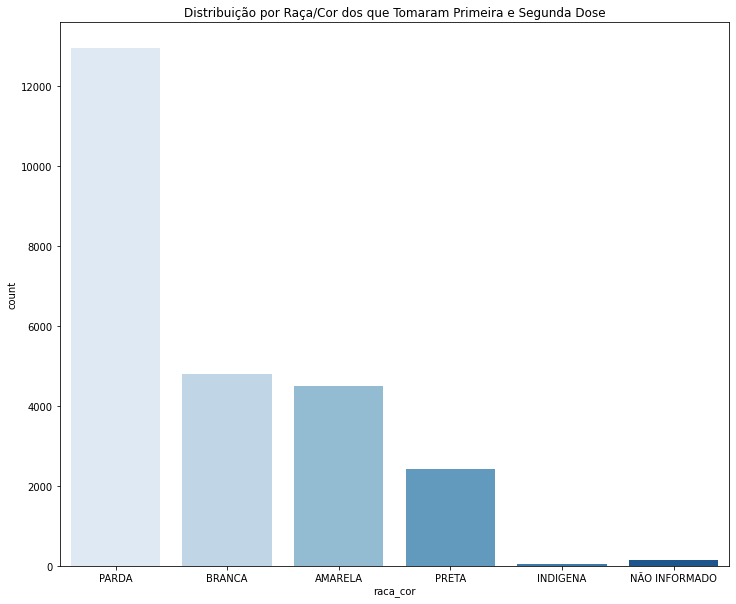

In [90]:
plt.figure(figsize=(12,10))
sns.countplot(x='raca_cor',data=pri_seg_dose, palette='Blues')
plt.title('Distribuição por Raça/Cor dos que Tomaram Primeira e Segunda Dose')
plt.show()

In [91]:
df_r = df[df['municipio']!="RECIFE"]
df_r.shape
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10547 entries, 101 to 738187
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                10547 non-null  int64 
 1   faixa_etaria       10547 non-null  object
 2   idade              10547 non-null  int64 
 3   qtd_vacinados      10547 non-null  int64 
 4   sexo               10547 non-null  object
 5   raca_cor           10547 non-null  object
 6   municipio          10547 non-null  object
 7   grupo              10547 non-null  object
 8   categoria          10547 non-null  object
 9   lote               10547 non-null  object
 10  vacina_fabricante  10547 non-null  object
 11  descricao_dose     10547 non-null  int64 
 12  cnes               10547 non-null  object
 13  sistema_origem     10547 non-null  object
 14  data_vacinacao     10547 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


FEIXA ETARIA DE QUEM TOMOU DOSE E NÃO É DO RECIFE

De acordo com a representação gráfica abaixo, vê-se que pessoas entre 39 e 45 anos foram as que mais tomaram vacina tendo que se locomover de seus municípios originários, além de um grande público entre 20 e 38. Vale salientar que estes grupos não são prioritários no esquema de vacinação.

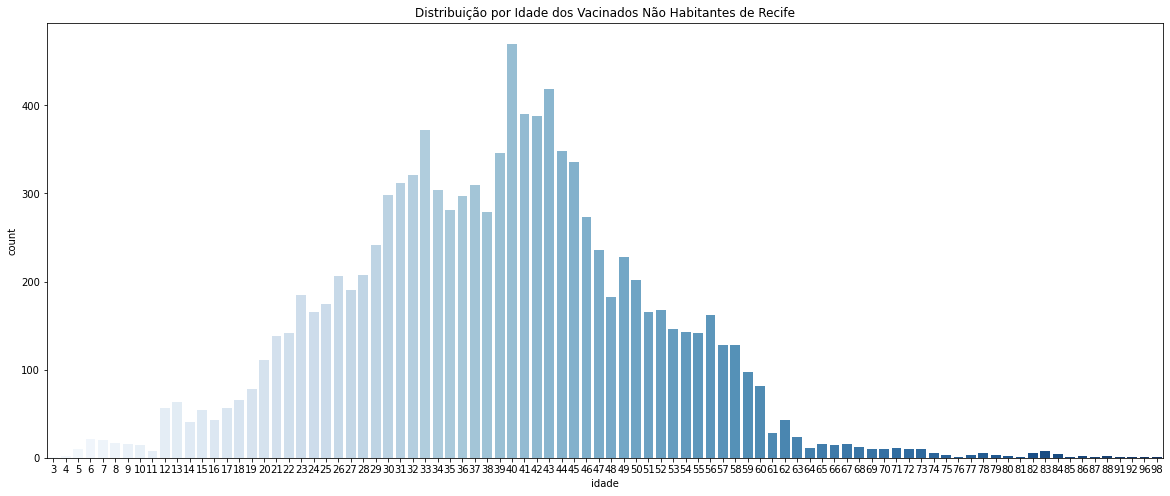

In [92]:
# Histograma SEABORN
plt.figure(figsize=(20, 8))
sns.countplot(x='idade', data=df_r, palette='Blues')
plt.title('Distribuição por Idade dos Vacinados Não Habitantes de Recife')
plt.show()

In [93]:
# Histograma PLOTLY EXPRESS
r1_hist_px = px.histogram(df_r, x="idade")
fig.update_layout(title='<b>Distribuição por Idade dos Vacinados Não Habitantes de Recife</b>',
                  yaxis_title="Quantidade",
                  xaxis_title="Idade")
r1_hist_px.show()

DOSE QUE AS PESSOAS QUE NÃO SÃO DO RECIFE TOMARAM NO RECIFE

Somando-se à observação feita acima, nota-se que aproximadamente 67,1% das doses aplicadas em pessoas não habitantes de Recife foi a primeira dose de reforço. Desta forma, é possível sugerir que, em 2022, municípios menores não disponibilizaram ou em menor escala as 3ª e 4ª doses, ou que tenham dado preferência àqueles que foram em busca da 1ª ou 2ª dose, de forma que fosse completado o ciclo básico de vacinação contra COVID-19.

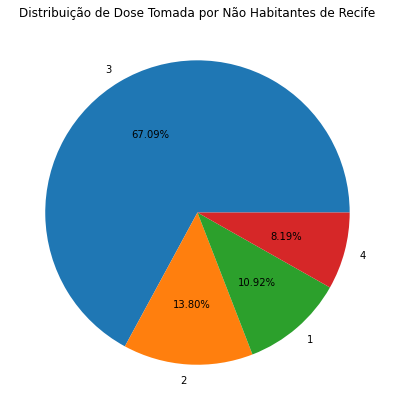

In [94]:
# Pizza MATPLOTLIB
r2_pie = plt.figure(figsize=(10, 7))
ext_vac = df_r['descricao_dose'].value_counts()
labels = df_r['descricao_dose'].unique()
plt.pie(ext_vac, labels=labels, autopct='%.2f%%')
plt.title("Distribuição de Dose Tomada por Não Habitantes de Recife")
plt.show()

In [95]:
# Pizza PLOTLY EXPRESS
r2_pie_px = px.pie(df_r, values=df_r['descricao_dose'].value_counts(normalize=True).values*100, names=df_r['descricao_dose'].value_counts().index, width=450, height=450)
r2_pie_px.update_traces(hoverinfo='label', textinfo='percent', title='<b>Distribuição de Dose Tomada por Não Habitantes de Recife</b>')
r2_pie_px.show()

DOSES APLICADAS POR FABRICANTES

Nota-se que, segundo representação gráfica abaixo, os tipos de vacinas aplicadas em 2022 foram da Pfizer e Astrazeneca. Dado que a maioria das aplicações foi para doses de reforço (no PandasProfiling), podemos supor que a Prfeitura do Recife seguiu evidências de estudos (https://www.saopaulo.sp.gov.br/noticias-coronavirus/vacina-da-pfizer-como-dose-de-reforco-aumenta-em-ate-25-vezes-anticorpos/) onde verifica-se que estes dois tipos são mais eficazes nesta etapa do ciclo de vacinação.

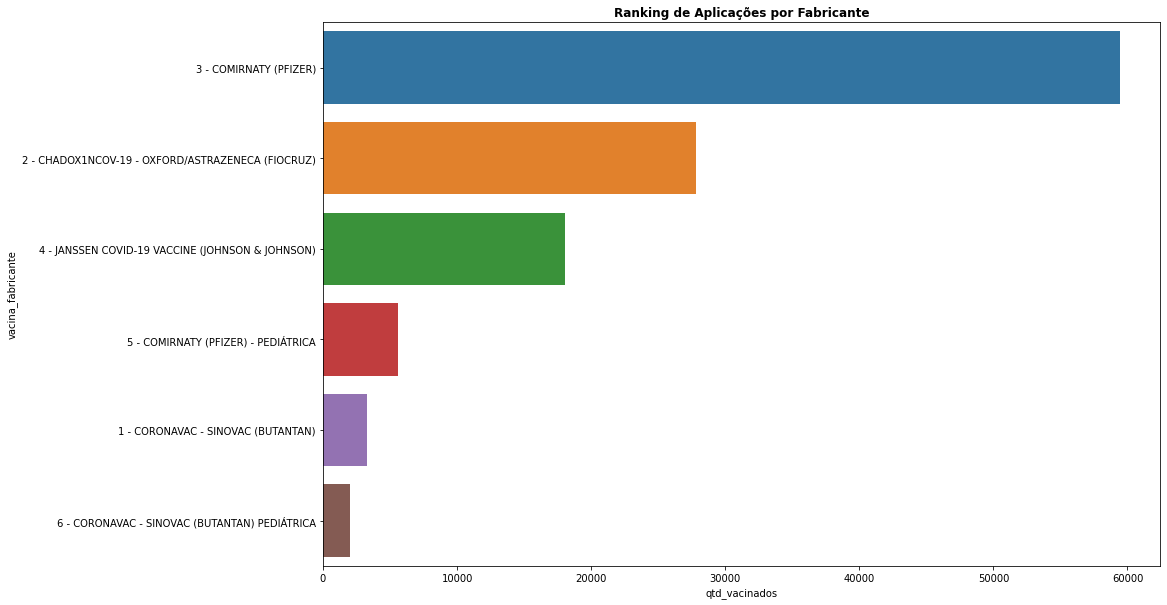

In [96]:
# Barras SEABORN
plt.figure(figsize=(15, 10))
r3_bar = df.groupby(by='vacina_fabricante').sum()
r3_bar = r3_bar.sort_values(by='qtd_vacinados',ascending=False)
r3_bar = r3_bar['qtd_vacinados']
plt.title('Ranking de Aplicações por Fabricante',fontweight='bold')
sns.barplot(y=r3_bar.index, x=r3_bar)
plt.show()

In [97]:
# Barras PLOTLY EXPRESS
df_fabvac = df.groupby('vacina_fabricante').count().reset_index()
df_fabvac = df_fabvac.sort_values('qtd_vacinados', ascending=True)
px.bar(df_fabvac, x='qtd_vacinados', y='vacina_fabricante', title='Ranking de Aplicações por Fabricante', height=800, width=1000)

FAIXA ETARIA DE QUEM TOMOU A PRIMEIRA DOSE EM 2022

Através da análise a baixo, podemos observar que a faixa etária de 35 a 39 anos, tomaram a primeira dose da vacinação de COVID 19 apenas no ano de 2022, sendo que a promeira dose foi aplicada ainda em 2020, comprovando assim as falas que as pessoas de mais idade não confiavam na vacina em seu lançamento, e a penas estão a tomando dois anos depois de seu lançamento.

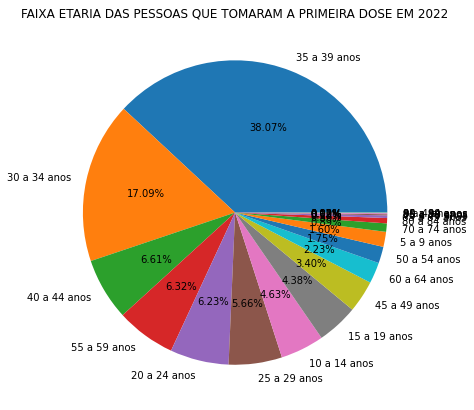

In [98]:
#FILTRA O DATASET PARA PEGAR APENAS AS PESSOAS QUE TOMARAM A PRIMEIRA DOSE
dfPrimeiraDose = df['descricao_dose'] == 1
#INSERE A VARIÁVEL CRIANDO UM FILTRO COM UM DATASET TEMPORÁRIO NA VARIAVEL, NÃO EDITA O DATASET ORIGINAL.
dfPrimeiraDose = df[dfPrimeiraDose]
#CARREGA E EXIBE O GRATICO COM A VARIÁVEL TRATADA ACIMA.
plot1 = plt.figure(figsize=(10, 7))
pag_val = dfPrimeiraDose['faixa_etaria'].value_counts()
labels = dfPrimeiraDose['faixa_etaria'].unique()
plt.pie(pag_val, labels=labels, autopct='%.2f%%')
plt.title("FAIXA ETARIA DAS PESSOAS QUE TOMARAM A PRIMEIRA DOSE EM 2022")
plt.show()

SEXO DE QUEM TOMOU A PRIMEIRA DOSE EM 2022

Atavés do grafico a baixo, podemos observar qur o maior numero de pessoas que tomaram a primeira dose da vacina em 2022 são mulheres, em controversa aos achismos que os homens seriam os mais inseguros com a tomada da vacina contra COVID 19.

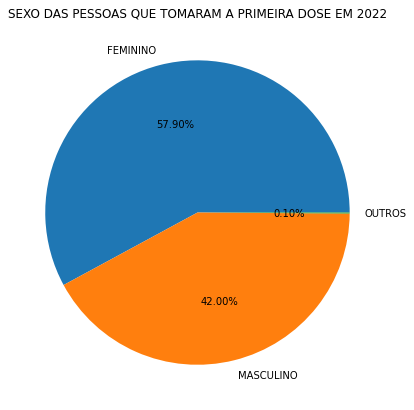

In [99]:
#FILTRA O DATASET PARA PEGAR APENAS AS PESSOAS QUE TOMARAM A PRIMEIRA DOSE
dfPrimeiraDose = df['descricao_dose'] == 1
#INSERE A VARIÁVEL CRIANDO UM FILTRO COM UM DATASET TEMPORÁRIO NA VARIAVEL, NÃO EDITA O DATASET ORIGINAL.
dfPrimeiraDose = df[dfPrimeiraDose]
#CARREGA E EXIBE O GRATICO COM A VARIÁVEL TRATADA ACIMA.
plot1 = plt.figure(figsize=(10, 7))
pag_val = dfPrimeiraDose['sexo'].value_counts()
labels = dfPrimeiraDose['sexo'].unique()
plt.pie(pag_val, labels=labels, autopct='%.2f%%')
plt.title("SEXO DAS PESSOAS QUE TOMARAM A PRIMEIRA DOSE EM 2022")
plt.show()

RAÇA/COR DE QUEM TOMOU A PRIMEIRA DOSE EM 2022

A baixo identificamos as etinias de quem tomou a vacina da COVID 19, metade dos vacinados foram identificados com etinia AMARELA.

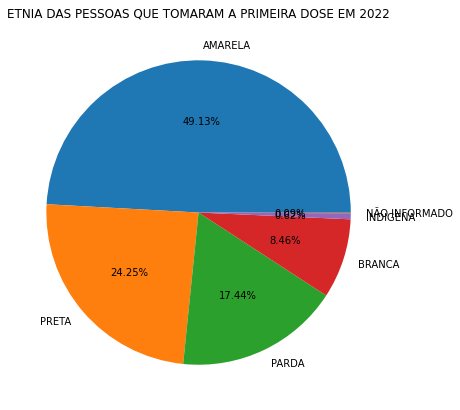

In [100]:
#FILTRA O DATASET PARA PEGAR APENAS AS PESSOAS QUE TOMARAM A PRIMEIRA DOSE
dfPrimeiraDose = df['descricao_dose'] == 1

#INSERE A VARIÁVEL CRIANDO UM FILTRO COM UM DATASET TEMPORÁRIO NA VARIAVEL, NÃO EDITA O DATASET ORIGINAL.
dfPrimeiraDose = df[dfPrimeiraDose]
#CARREGA E EXIBE O GRATICO COM A VARIÁVEL TRATADA ACIMA.
plot1 = plt.figure(figsize=(10, 7))
pag_val = dfPrimeiraDose['raca_cor'].value_counts()
labels = dfPrimeiraDose['raca_cor'].unique()
plt.pie(pag_val, labels=labels, autopct='%.2f%%')
plt.title("ETNIA DAS PESSOAS QUE TOMARAM A PRIMEIRA DOSE EM 2022")
plt.show()